<h1>Random motion in 1D</h1>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

<p>Many processes in physics and chemistry happen randomly or stochastically, whic. This is in contrast to deterministic problems where we can exactly predict the future based if we now the current state of the system. For example, we can predict the velocity of object if we know the initial velocity and the forces it feels. However, in many cases we only know the probabilities of different outcomes. For example, when we roll a die, we don't know which face of the die will end up facing the ground, we only know the *probability* of seeing any of of the faces.</p>

<p> In the case of the die, there are six different outcomes and they all have equal probability (if it is an unbiased die). In general, if there are $N$ outcomes, each with probability $p_i$ then the probabilities must be normalized, $$\sum\limits_{i}^N p_i = 1$$ In other words, the probability that something happens is $1$. </p>

<h3>A random walk in one dimension</h3>
<p>As a first example, consider the trajectory of a speck of dust floating in a cup of water. For the moment let's imagine that the dust can only move in one dimension. Since the dust is bombarded by water molecules in a random way we cannot know it's trajectory exactly. The trajectory is random or stochastic: the dust takes a step to the right $x > 0$ with probability $p$ and to the left $x < 0$ with probabilty $q$.</p>

In [19]:
p = 0.5
q = 1. - p

<p>Let's take a look at the trajectory of the fly for a large number of steps.</p>

mean: 37.33
std. dev.: 31.23


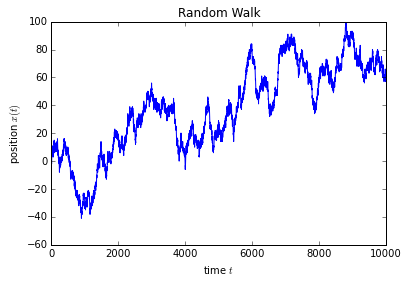

In [21]:
Nsteps = 10000
x = np.zeros(Nsteps)
for t in range(1,Nsteps):
    if np.random.rand() <= p:
        x[t] = x[t - 1] + 1
    else:
        x[t] = x[t - 1] - 1
print "mean: %.2f" % np.mean(x)
print "std. dev.: %.2f" % np.std(x)
plt.plot(x)
plt.title("Random Walk")
plt.xlabel("time $t$")
plt.ylabel("position $x(t)$")
plt.show()

Notice that if you rerun the previous cell you will see a different trajectory each time. What if we were observing the random walks of many independent specks of dust, what would be properties of the set of random walks?

<h3>Many random walkers: The binomial distribution</h3>

<p>We can derive the probability distribution of outcomes using the probability to step in either direction. By choosing.</p>

<p>Let's generate some trajectories and see how they relate to the formula we have derived.</p>

In [23]:
Nsteps = 10000
Nwalkers = 1000
xmany = np.zeros((Nwalkers,Nsteps))
for n in range(Nwalkers):
    for t in range(1,Nsteps):
        if np.random.rand() <= p:
            xmany[n,t] = xmany[n,t - 1] + 1
        else:
            xmany[n,t] = xmany[n,t - 1] - 1
#print "mean: %.2f" % np.mean(x)
#print "std. dev.: %.2f" % np.std(x)

<p>We see that the trajectories are initially clustered around the origin and spread out as time proceeds. By plotting them with some transperancy we can qualitatively tell that the density around the origin (xdecreases. </p>

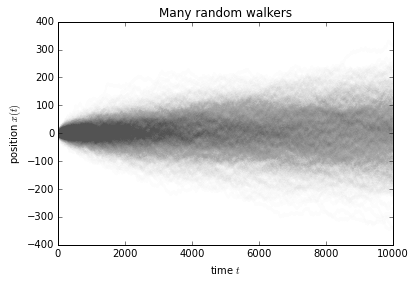

In [42]:
plt.plot(xmany.T,alpha=0.01,lw=2,color='k')
plt.title("Many random walkers")
plt.xlabel("time $t$")
plt.ylabel("position $x(t)$")
plt.show()

<p>Even though the individual trajectories are random we can look at properites of the distribution of outcomes as a function of time $p(x,t)$.</p>

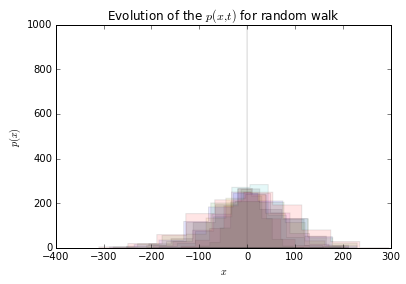

In [41]:
for i in range(0,Nsteps,Nsteps/10):
    plt.hist(xmany[:,i],histtype="stepfilled",alpha=0.1)
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.title("Evolution of the $p(x,t)$ for random walk")

<p>For example, we can see that the variance of the distribution $p(x,t)$ grows linearly with time:$$\langle x^2 \rangle = t $$</p>

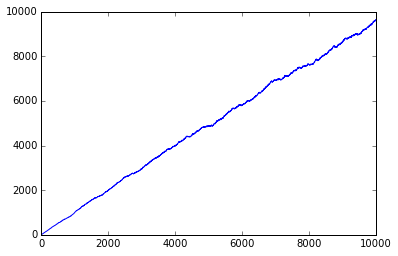

In [36]:
plt.plot(np.var(xmany,axis=0))

<p> This observation was pointed out by Einstein in his work on brownian motion where he derived the relation, $$\langle x^2\rangle = 2Dt$$, where $D$ is the diffusion coefficient that depends on the temperature $T$ and viscosity of the medium $$D \propto \frac{T}{\eta}$$ </p>